In [1]:
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = imread("./data/FISH_RGB.TIF")[:500, :500]
print(image.shape)

(500, 500, 3)


(-0.5, 499.5, 499.5, -0.5)

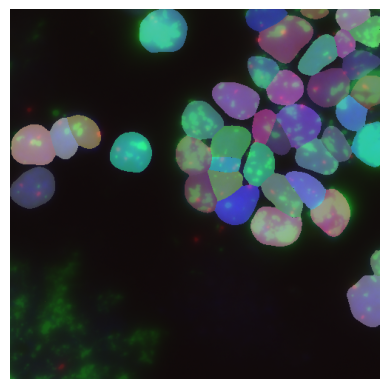

In [3]:
from CellPatchExtraction.src.extraction import extract_patches
from cellpose.models import CellposeModel
from plotutils.patches import gridPlot
from plotutils.segmentation import rand_col_seg

patches, segmentation = extract_patches(
    image, 
    "CP_TU", 
    cellpose_kwargs={"diameter": 50, "min_size": 400}, 
    patch_size=128, 
    nuclear_channel=2,
    return_segmentation=True)

plt.imshow(image)
plt.imshow(rand_col_seg(segmentation), alpha=0.5)
plt.axis("off")

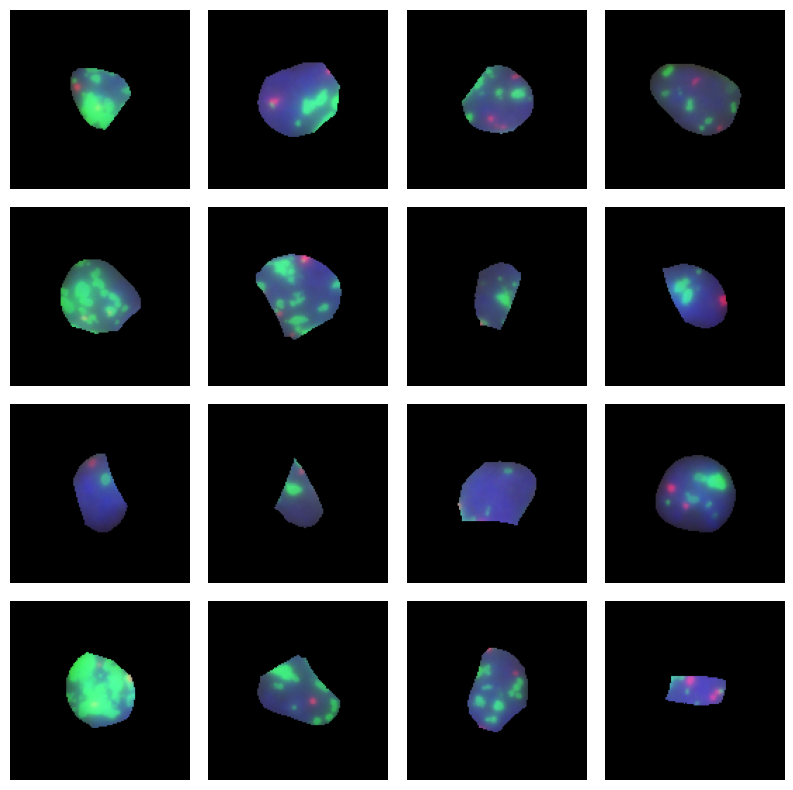

In [4]:
gridPlot(patches, channels_to_show=[0, 1, 2], layout="auto", grid_size=(4, 4))

In [11]:
import h5py 
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

def read_and_normalize_image(file_path):
    # Read the image file
    
    image = tifffile.imread(file_path)
    image = image.transpose(2, 0, 1)
    
    # Normalize each channel of the image
    for n, im in enumerate(image):
        low, high = np.percentile(im, 1), np.percentile(im, 99.5)
        im = np.clip((im - low) / (high - low), 0, 1)
        image[n] = im * 255
        
    # Display the normalized image
    # plt.imshow(image.transpose(1, 2, 0).astype(np.uint8))
    # plt.show()

    return image.transpose(1,2,0)

images = list(Path("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/20230605_FISH/samples").glob("**/*.tif"))
images = [str(p) for p in images if "masks" not in str(p.parent).lower() and ".s" in str(p.parent).lower()]

sampled_images = np.random.choice(images, 40)

def is_within(dat, low, high):
    return np.logical_and(dat > low, dat < high)

chosen = []
for image in tqdm(sampled_images):
    
    im = read_and_normalize_image(image)  
    mean = im.mean(axis=(0,1))
    std = im.std(axis=(0,1))
    print(mean, std)#is_within(mean[0], 30, 90), is_within(mean[1], 30, 90), is_within(mean[2], 20, 90))
    if is_within(mean[0], 30, 60) and is_within(mean[1], 30, 90) and is_within(mean[2], 20, 90):
        chosen.append(im)
        
    if len(chosen) == 10:
        break

  2%|▎         | 1/40 [00:00<00:28,  1.37it/s]

[38.1963514  28.44792853 24.89123568] [44.924052   44.91893482 54.19998587]


  5%|▌         | 2/40 [00:01<00:24,  1.58it/s]

[39.79861695 40.64558582 76.50419021] [37.36567403 48.60167236 74.70087556]


  8%|▊         | 3/40 [00:01<00:23,  1.55it/s]

[70.8381847  55.00207944 80.78393326] [37.2157686  31.82796052 56.18935992]


 10%|█         | 4/40 [00:02<00:23,  1.52it/s]

[56.32655995 51.06410389 52.30055963] [50.9671021  50.89880056 63.7585053 ]


 12%|█▎        | 5/40 [00:03<00:23,  1.49it/s]

[73.21819154 39.24809747 88.03830201] [40.26612415 29.77933812 61.21197625]


 15%|█▌        | 6/40 [00:03<00:22,  1.50it/s]

[43.8105521  51.76997449 67.17694875] [38.5299252  59.51550288 73.22140476]


 18%|█▊        | 7/40 [00:04<00:22,  1.46it/s]

[33.59568811 57.35715717 72.98842976] [35.27012206 66.80084567 76.82141208]


 20%|██        | 8/40 [00:05<00:20,  1.58it/s]

[37.37407403 24.07051062 52.28633518] [30.87313637 26.37387804 62.40833571]


 22%|██▎       | 9/40 [00:05<00:20,  1.53it/s]

[38.69105277 47.62404955 50.94632007] [42.66720283 59.66992264 65.4665386 ]


 25%|██▌       | 10/40 [00:06<00:20,  1.46it/s]

[35.55447959 51.15061551 66.69931471] [37.13704614 59.7912126  75.11363294]


 28%|██▊       | 11/40 [00:07<00:19,  1.49it/s]

[252.13980347  45.16049015  63.89411934] [26.39685859 32.50041912 63.40639173]


 30%|███       | 12/40 [00:07<00:18,  1.51it/s]

[28.2812376  25.05592974 33.92295079] [41.31391573 40.55599761 63.12354718]


 32%|███▎      | 13/40 [00:08<00:18,  1.48it/s]

[35.86836381 43.65347633 73.59225839] [34.66367843 53.99293718 74.09408026]


 35%|███▌      | 14/40 [00:09<00:17,  1.53it/s]

[51.58312335 31.83467339 67.36680203] [40.33391677 32.18678924 61.38887477]


 38%|███▊      | 15/40 [00:09<00:16,  1.51it/s]

[39.34036728 51.29405074 67.79361468] [39.55155573 60.39967336 74.94393285]


 38%|███▊      | 15/40 [00:10<00:17,  1.41it/s]

[42.77749226 32.96544562 75.97400914] [32.62577012 29.5112955  56.60964052]


In [12]:
for im in chosen:
    
    

10


In [7]:
# h5py File Organization:

# - training
#     - 0
#         - bboxes
#         - lables
#         - patch
#     - 1
#         - bboxes
#         - lables
#         - patch
#     ...
#     - n
#         - bboxes
#         - lables
#         - patch
# - validaton
#     - 0
#         - bboxes
#         - lables
#         - patch
#     - 1
#         - bboxes
#         - lables
#         - patch
#     ...
#     - m
#         - bboxes
#         - lables
#         - patch